In [2]:
import argparse
# from core.base_dataset import BaseDataset
# from models.metric import inception_score
import glob
import numpy as np
import os 
from tqdm import tqdm
import matplotlib.pyplot as plt
from tabulate import tabulate
import json

In [3]:
dst = r"..\repos\Palette\experiments\test_v11_derivative_240627_180620\results\test\0"
src = r"..\data\processed\BP_npy\0625_256_2_diff_clean\p00\scale_train.npy"
test = r"..\data\processed\BP_npy\0625_256_2_diff_clean\p00\test.npy"

In [4]:
def calc_min_max(x):
    # x = (x.astype(np.float32)/127.5-1)
    return np.nanmin(x,axis=1),np.nanmax(x,axis=1)
def create_plots(x,y):
    n=4
    x *= 200
    y *= 200
    fig,axes = plt.subplots(2,n,figsize=(10,5),tight_layout=True)
    for i in range(n):
        axes[0,i].plot(x[i,:])
        axes[1,i].plot(y[i,:])
    plt.show()
    plt.close()
    

In [5]:
def error_report(errors):
    n_samples = errors.shape[1]
    print("n_samples:",n_samples)
    me = np.mean(errors,axis=1)
    mae = np.mean(np.abs(errors),axis=1)
    rmse = np.sqrt(np.mean(errors**2,axis=1))
    std = np.std(errors,axis=1)
    print(me.shape,mae.shape,rmse.shape,std.shape)
    error_5 = np.count_nonzero(np.abs(errors)<=5,axis=1)/n_samples*100
    error_15 = np.count_nonzero(np.abs(errors)<=15,axis=1)/n_samples*100
    error_10 = np.count_nonzero(np.abs(errors)<=10,axis=1)/n_samples*100
    print("""
        test data samples:
        # samples : {}
        
        Eval Stats:   DBP    SBP
        MAE:        {:6.3f} {:6.3f}
        RMSE:       {:6.3f} {:6.3f}
        Mean Error: {:6.3f} {:6.3f}
        STD:        {:6.3f} {:6.3f}
        
        BHS standards range:
        Error   <5mmHg <10mmHg <15mmHg
        gradeA     60%     85%     95%
        gradeB     50%     75%     90%
        gradeC     40%     65%     85%
        DBP     {:5.1f}%  {:5.1f}%  {:5.1f}%
        SBP     {:5.1f}%  {:5.1f}%  {:5.1f}%
        
        
        """.format(
        n_samples,
        *mae,
        *rmse,
        *me,
        *std,
        error_5[0], error_10[0], error_15[0],
        error_5[1], error_10[1], error_15[1],
        ))

# old

In [6]:
n_patients = 0
errors = []
gt = []
cond= []
out = []
scales = np.load(src)
print("aaaa",scales.shape,scales[:10])
# for i in p0n_dir:
gt_files = glob.glob(f"{dst}\GT_*.npy")
cond_files = glob.glob(f"{dst}\Process_*.npy")
out_files = glob.glob(f"{dst}\OUT_*.npy")
for j in tqdm(range(len(gt_files))):
    # output = np.load(os.path.join(file,args.dst))
    gt.append(np.load(os.path.join(gt_files[j])))
    # plt.plot(gt[0,:])
    # plt.show()
    cond.append(np.load(os.path.join(cond_files[j])))
    out.append(np.load(os.path.join(out_files[j])))
    # print(gt.shape,out.shape,gt.dtype)
    # calc min and max"
    if j % 50 == 0:
        # create_plots(gt,out)
        pass
print(gt[-1].shape)
out = np.concatenate(out,axis=0)
gt = np.concatenate(gt,axis=0)
scales = scales[:out.shape[0]]
gt[:] -= scales[0,0][:, None]
gt[:] /= scales[0,1][:, None]
out[:] -= scales[0,0][:, None]
out[:] /= scales[0,1][:, None]
cond = np.load(test)[:,:,1]
print(cond.shape)
# cond = np.concatenate(cond,axis=0)
gt_mean = np.mean(gt.flatten())
out_mean = np.mean(out.flatten())
cond_mean = np.mean(cond.flatten())
gt_std = np.std(gt.mean(axis=1),dtype=np.float64)
out_std = np.std(out.mean(axis=1),dtype=np.float64)
cond_std = np.std(cond.mean(axis=1),dtype=np.float64)
print(np.count_nonzero(np.isnan(out)))
headers = ["Signal", "Mean","Std"]
table = [["data_ppg", 0.494153162946643,0.10694360087091538],
        ]
table.append(["cond_ppg",cond_mean,cond_std])
table.append( ["data_abp",0.39593121533751857,0.13489903083932583])
table.append(["gt",gt_mean,gt_std])
table.append(["out",out_mean,out_std])
print(tabulate(table,headers, floatfmt=".4f"))
# print(gt_mean,gt_std,out_mean,out_std,cond_mean,cond_std)
# print(gt.shape,out.shape)
# out = (out-out_mean)/out_std*0.1349+0.396
# out = (out-out_mean)/out_std*gt_std+gt_mean
gt_min,gt_max = calc_min_max(gt)
gt_argmin,gt_argmax = np.argmin(gt,axis=1),np.argmax(gt,axis=1)
out_min,out_max = calc_min_max(out)
out_argmin,out_argmax = np.argmin(out,axis=1),np.argmax(out,axis=1)
# print(out_max.shape,out_max[:10])
errors = np.zeros((2,*out_min.shape))
# print(error.shape)
errors[0,:]=gt_min-out_min
errors[1,:]=gt_max-out_max

aaaa (2, 2) [[-0.38523263  0.00769614]
 [ 0.41347189  1.60360274]]


100%|██████████| 26/26 [00:00<00:00, 91.81it/s] 

(500, 256)


IndexError: invalid index to scalar variable.

# new v3

In [7]:
src = r"..\repos\Palette\experiments\test_v11_derivative_240627_180620"

epoch = 0
epoch = str(epoch)

### load
- scales at data dir
- output 
    - gt (abp)
    - out (abp)
    - cond (ppg)
- (optional)train at data dir

In [8]:
with open(os.path.join(src,"config.json"), "r") as file:
    json_data = json.load(file)

scale_dir = json_data["datasets"]["train"]["which_dataset"]["args"]["data_root"]
print(scale_dir)
train = np.load(os.path.join(r"..\repos\Palette",scale_dir,"train.npy"))
train_ppg = train[:,:,1]
train = train[:,:,0]
scales = np.load(os.path.join(r"..\repos\Palette",scale_dir,"scale_train.npy"))
result_dir = os.path.join(src,"results","test",epoch)
gt = []
cond= []
out = []
gt_files = glob.glob(f"{result_dir}\GT_*.npy")
cond_files = glob.glob(f"{result_dir}\Process_*.npy")
out_files = glob.glob(f"{result_dir}\OUT_*.npy")
for j in tqdm(range(len(gt_files))):
    gt.append(np.load(os.path.join(gt_files[j])))
    cond.append(np.load(os.path.join(cond_files[j])))
    out.append(np.load(os.path.join(out_files[j])))
print(gt[-1].shape)
out = np.concatenate(out,axis=0)
gt = np.concatenate(gt,axis=0)
cond = np.concatenate(cond,axis=0)
print(out.shape,gt.shape,cond.shape)

..\..\data\processed\BP_npy\0625_256_2_diff_clean\p00


100%|██████████| 26/26 [00:00<00:00, 881.04it/s]

(500, 256)
(12608, 256) (12608, 256) (12608, 3, 256)


In [ ]:
out.shape

(12608, 256)

In [ ]:
def average(arr):
    return 

### vae

In [ ]:
scales = np.load(r"..\data\processed\BP_npy\0325_256_corr_clean\p00\scale_train.npy")
train  =np.load(r"..\data\processed\BP_npy\0325_256_corr_clean\p00\train.npy")
train_ppg = train[:,:,1]
train = train[:,:,0]
cond  = np.load(r"..\data\processed\BP_npy\0325_256_corr_clean\p00\test.npy")[:,:,1]
arr = np.load(r".\outputs\0531_bp\output.npz")
out = np.average(arr['out'],axis=1)
gt = np.average(arr['gt'],axis=1)
scales.shape,out.shape,gt.shape,arr

((1, 2),
 (2000, 256),
 (2000, 256),
 NpzFile '.\\outputs\\0531_bp\\output.npz' with keys: out, gt)

In [ ]:
scales.shape,scales[0,0]

((2, 2), -0.38523262901534805)

In [9]:


# scales = scales[:out.shape[0]]
print(scales.shape,gt.shape,out.shape,scales)
# 正規化を元に戻す
# train[:] -= scales[:,0][:, None]
# train[:] /= scales[:,1][:, None]
gt[:] -= scales[0,0]
gt[:] /= scales[0,1]
out[:] -= scales[0,0]
out[:] /= scales[0,1]
# train_mean = np.mean(train.flatten())
# train_ppg_mean = np.mean(train_ppg.flatten())
# train_ppg_std = np.std(train_ppg.mean(axis=1),dtype=np.float64)
# train_std = np.mean(np.std(train.mean(axis=1),dtype=np.float64))
gt_mean = np.mean(gt.flatten())
out_mean = np.mean(out.flatten())
cond_mean = np.mean(cond.flatten())
gt_std = np.std(gt.mean(axis=1),dtype=np.float64)
out_std = np.std(out.mean(axis=1),dtype=np.float64)
cond_std = np.std(cond.mean(axis=1),dtype=np.float64)
print(np.count_nonzero(np.isnan(out)))

headers = ["Signal", "Mean","Std"]
table=[]
# table.append(["train_ppg",train_ppg_mean,train_ppg_std])
table.append(["cond_ppg",cond_mean,cond_std])
# table.append(["train",train_mean,train_std])
# table.append(["data_ppg", 0.494153162946643,0.10694360087091538])
# table.append(["data_abp",0.39593121533751857,0.13489903083932583])
table.append(["gt",gt_mean,gt_std])
table.append(["out",out_mean,out_std])
print(tabulate(table,headers, floatfmt=".4f"))


(2, 2) (12608, 256) (12608, 256) [[-0.38523263  0.00769614]
 [ 0.41347189  1.60360274]]
0
Signal       Mean      Std
--------  -------  -------
cond_ppg   0.1408   0.0749
gt        88.2110  12.6067
out       91.4291  14.3534


In [10]:
# 血圧の最大値(SBP)最小値(DBP)を計算
gt_min,gt_max = calc_min_max(gt)
out_min,out_max = calc_min_max(out)
gt_min,gt_max = calc_min_max(gt)
gt_argmin,gt_argmax = np.argmin(gt,axis=1),np.argmax(gt,axis=1)
out_min,out_max = calc_min_max(out)
out_argmin,out_argmax = np.argmin(out,axis=1),np.argmax(out,axis=1)
# print(out_max.shape,out_max[:10])
errors = np.zeros((2,*out_min.shape))
# print(error.shape)
errors[0,:]=gt_min-out_min
errors[1,:]=gt_max-out_max

In [ ]:
gt_fft = np.abs(np.fft.fftn(out,axes=[1]))[:,:128]
cond_fft = np.abs(np.fft.fftn(cond[:,0],axes=[1]))[:,:128]
freq= np.fft.fftfreq(256,1/125)[:128]
gt_fft.shape,cond_fft.shape


((12608, 128), (12608, 128))

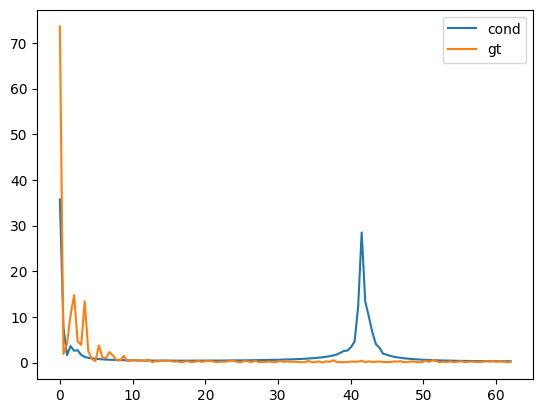

In [ ]:
i = np.random.randint(gt.shape[0])
plt.plot(freq,cond_fft[i],label='cond')
plt.plot(freq,gt_fft[i],label='gt')
plt.legend()

In [ ]:
a = []
for i in range(gt.shape[0]):
    c  =np.corrcoef(cond_fft[i],gt_fft[i])[0][1]
    if  c>0.8:
        a.append(i)
    else:
        print(c,end=" ")
# a = np.array(a)
# a.shape,
len(a),gt.shape[0]

0.638188252595027 0.6470188075312239 0.6422921580703678 0.6502554271543854 0.6104493661801614 0.6210756352457139 0.6030167386735731 0.6249934856541931 0.6429072871525844 0.6761186937588398 0.6669095324864448 0.6213348525185975 0.6166366449380437 0.5834060803813587 0.6164350710687658 0.6267722704865 0.6369719190378101 0.6121810445851791 0.6353606849181761 0.6483944179402942 0.6094692166525182 0.6196017362764417 0.6318817835061222 0.6535797586240887 0.6203061455014408 0.6163878883780742 0.5969100095853376 0.6048618489872791 0.601279654233404 0.6339423944172224 0.6246288720307528 0.608009516909904 0.626067548297616 0.6197684382298201 0.6603269194404926 0.6755708409546307 0.6258741613941168 0.6282908346766317 0.6334501886301893 0.6345865926977354 0.5998174392388465 0.6502060282246196 0.6493372545649985 0.6328185134689348 0.6651249076707897 0.6035329622092347 0.6066996655427597 0.5748675005300392 0.6395847054043142 0.6170779324529974 0.66220262724019 0.6976529822247085 0.5954398097945581 0.

(0, 12608)

In [ ]:
flg = np.load(r"../data/processed/BP_npy/0625_256_2_diff_clean/p00/fft_corr_flg08_test.npy")[:out.shape[0]]
flg.shape

(12608,)

In [ ]:
errors = errors[:,flg]
errors.shape

(2, 7336)

In [11]:
error_report(errors)

n_samples: 12608
(2,) (2,) (2,) (2,)

        test data samples:
        # samples : 12608
        
        Eval Stats:   DBP    SBP
        MAE:        11.281 21.991
        RMSE:       14.670 27.528
        Mean Error: -0.251 -7.661
        STD:        14.667 26.441
        
        BHS standards range:
        Error   <5mmHg <10mmHg <15mmHg
        gradeA     60%     85%     95%
        gradeB     50%     75%     90%
        gradeC     40%     65%     85%
        SBP      30.8%   54.7%   71.2%
        DBP      14.9%   28.9%   41.6%
        
        
        


### 0513: バイアス調整
1. train, test(gt), out のDBP, SBPの平均値を計算
2. out = out-(mean_sbp(train) - mean_sbp(test))
3. 誤差計算

In [ ]:
def rescale(arr,scales):
    arr[:] -= scales[:,0]
    arr[:] /= scales[:,1]
    return arr

In [ ]:

train_dbp = np.min(train,axis=1)
train_sbp = np.max(train,axis=1)
print(train.shape,train_sbp.shape,train_dbp.shape)

headers = ["Signal", "DBP","SBP"]
table=[]
table.append(["train",train_dbp.mean(),train_sbp.mean()])
table.append(["gt",gt_min.mean(),gt_max.mean()])
table.append(["out",out_min.mean(),out_max.mean()])
print(tabulate(table,headers, floatfmt=".4f"))

(103258, 256, 3) (103258, 3) (103258, 3)
Signal        DBP       SBP
--------  -------  --------
train      0.0256    0.2199
gt        66.1520  126.2342
out       66.4029  133.8954


In [ ]:
diff =train_sbp.mean()- gt_max.mean()
out_max2 = out_max- diff
out_min2 =out_min - diff
errors2 = np.zeros((2,*out_min.shape))
# print(error.shape)
errors2[0,:]=gt_min-out_min2
errors2[1,:]=gt_max-out_max2

In [ ]:
error_report(errors2)

n_samples: 86272
(2,) (2,) (2,) (2,)

        test data samples:
        # samples : 86272
        
        Eval Stats:   DBP    SBP
        MAE:         9.623 19.987
        RMSE:       12.647 24.982
        Mean Error:  1.809 -2.689
        STD:        12.517 24.837
        
        BHS standards range:
        Error   <5mmHg <10mmHg <15mmHg
        gradeA     60%     85%     95%
        gradeB     50%     75%     90%
        gradeC     40%     65%     85%
        SBP      36.0%   62.5%   78.7%
        DBP      15.9%   30.9%   45.1%
        
        
        


# error histogram

In [ ]:
np.max(errors[0]),np.min(errors[0]),np.max(errors[1]),np.min(errors[1])

(55.30177307128906, -125.85758209228516, 83.83848571777344, -92.50906372070312)

(-100.0, 85.0)

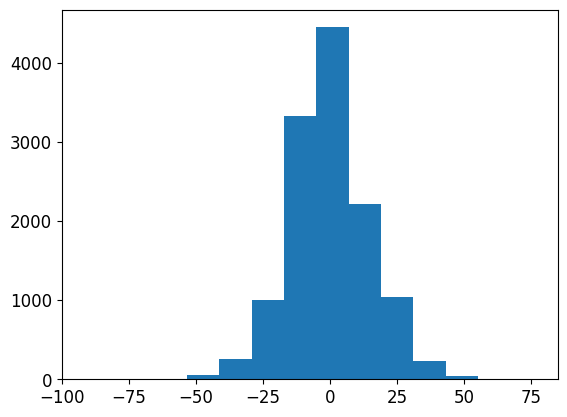

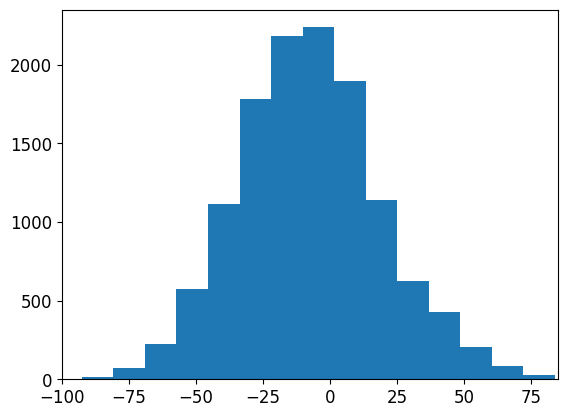

In [ ]:
plt.hist(errors[0],bins=15)
plt.tick_params(labelsize=12)
plt.xlim(-100,85)
plt.figure()
plt.hist(errors[1],bins=15)
plt.tick_params(labelsize=12)
plt.xlim(-100,85)


(38.0, 122.0)

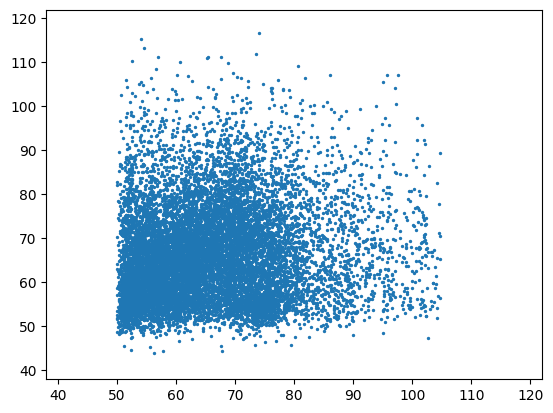

In [ ]:
plt.scatter(gt_min,out_min,s=2)
plt.ylim(38,122)
plt.xlim(38,122)

## plot 

In [ ]:
i = np.random.randint(2000)
# i = 14325
plt.figure(figsize=(6,2))
# plt.subplot(121)
plt.plot(gt[i],label='true')
plt.plot(out[i],c='orange',label='pred')
# plt.plot(cond[i],c='green',label='ppg')
plt.scatter(gt_argmax[i],gt_max[i],marker='x',c='black',zorder=2)
plt.scatter(gt_argmin[i],gt_min[i],marker='x',c='red',zorder=2)
plt.scatter(out_argmax[i],out_max[i],marker='o',c='black',zorder=2)
plt.scatter(out_argmin[i],out_min[i],marker='o',c='red',zorder=2)
plt.legend(loc='upper right')
# plt.legend(loc='lower right')
print(i)
i = np.random.randint(20000)
# i = 11805
# \
# plt.subplot(133)
# plt.plot(gt[i],label='true')
# plt.plot(out[i],c='orange',label='pred')
# plt.legend(loc='upper right')
# plt.scatter(gt_argmax[i],gt_max[i],marker='x',c='black',zorder=2)
# plt.scatter(gt_argmin[i],gt_min[i],marker='x',c='red',zorder=2)
# plt.scatter(out_argmax[i],out_max[i],marker='o',c='black',zorder=2)
# plt.scatter(out_argmin[i],out_min[i],marker='o',c='red',zorder=2)

NameError: name 'np' is not defined

## ppg

In [ ]:
arr = np.load(r".\outputs\0531\output.npz")
gt = arr['gt']
out = arr['out']
gt = np.average(gt,axis=1)
out = np.average(out,axis=1)
mse = np.mean(np.power(out-gt,2))
mae = np.mean(np.abs(out-gt))
print(gt.shape,out.shape)
print("mse:",mse,", mae:",mae)

(2000, 256) (2000, 256)
mse: 0.0020986763 , mae: 0.033231393


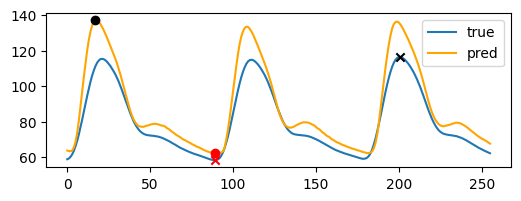

In [ ]:
i = np.random.randint(2000)
# i = 14325
plt.figure(figsize=(6,2))
# plt.subplot(121)
plt.plot(gt[i],label='true')
plt.plot(out[i],c='orange',label='pred')
plt.legend(loc='upper right')
plt.scatter(gt_argmax[i],gt_max[i],marker='x',c='black',zorder=2)
plt.scatter(gt_argmin[i],gt_min[i],marker='x',c='red',zorder=2)
plt.scatter(out_argmax[i],out_max[i],marker='o',c='black',zorder=2)
plt.scatter(out_argmin[i],out_min[i],marker='o',c='red',zorder=2)
plt.legend(loc='upper right')

12608
26


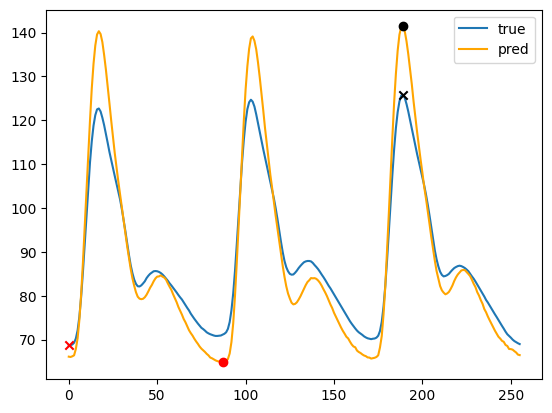

In [ ]:
asa = np.where(np.mean(out,axis=1)>0.8)[0]
print(len(asa))
i = asa[np.random.randint(56)]
print(i)
plt.plot(gt[i],label='true')
plt.plot(out[i],c='orange',label='pred')
# plt.plot(cond[i],c='green',label='ppg')
plt.scatter(gt_argmax[i],gt_max[i],marker='x',c='black',zorder=2)
plt.scatter(gt_argmin[i],gt_min[i],marker='x',c='red',zorder=2)
plt.scatter(out_argmax[i],out_max[i],marker='o',c='black',zorder=2)
plt.scatter(out_argmin[i],out_min[i],marker='o',c='red',zorder=2)
plt.legend(loc='upper right')

(-12.75, 267.75, 0.08003575607766494, 0.8628810271874068)

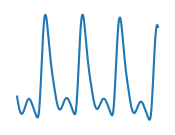

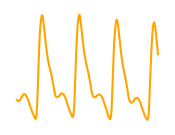

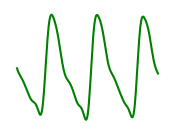

In [ ]:
i = 14325
plt.figure(figsize=(2,1.5))
plt.plot(gt[i],label='true')
# plt.scatter(gt_argmax[i],gt_max[i],marker='x',c='black',zorder=2)
# plt.scatter(gt_argmin[i],gt_min[i],marker='x',c='red',zorder=2)
plt.axis("off")
plt.figure(figsize=(2,1.5))
plt.plot(out[i],c='orange',label='pred')
# plt.scatter(out_argmax[i],out_max[i],marker='o',c='black',zorder=2)
# plt.scatter(out_argmin[i],out_min[i],marker='o',c='red',zorder=2)
plt.axis("off")
out_max[i],out_min[i]
plt.figure(figsize=(2,1.5))
plt.plot(cond[i],c='green',label='pred')
plt.axis("off")

(-12.75, 267.75, -3.304463303360795, 2.7091664651332072)

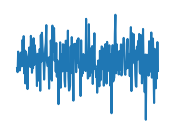

In [ ]:
plt.figure(figsize=(2,1.5))
plt.plot(np.random.randn(256),label='pred')
plt.axis("off")

## visualize validation loss from logfile

In [ ]:
def read_logfile(path):
    key = 'val/mae: '
    with open(path) as f:
        lines = f.readlines()

    # 改行コードを削除したリストを作成
    lines_strip = [line.strip() for line in lines]

    # "test"を含む行を抽出
    list_test = [line_s for line_s in lines_strip if key in line_s]

    # "test"以降の文字列を表示
    for i in range(len(list_test)):
        index = list_test[i].find(key) + len(key)
        list_test[i] = list_test[i][index:]
        list_test[i] = float(list_test[i])
    return list_test

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
path = r"../repos/Palette/experiments/train_ppg2abp_1DBP_v8_240411_132353/train.log"
a = read_logfile(path)
# path2 = r"../repos/Palette/experiments/test_ppg2abp_1DBP_v8_iter_240325_151104/test.log"
# b = read_logfile(path2)
# a.extend(b)

In [ ]:
np.argmin(a)+1,np.min(a)

(218, 0.09724119305610657)

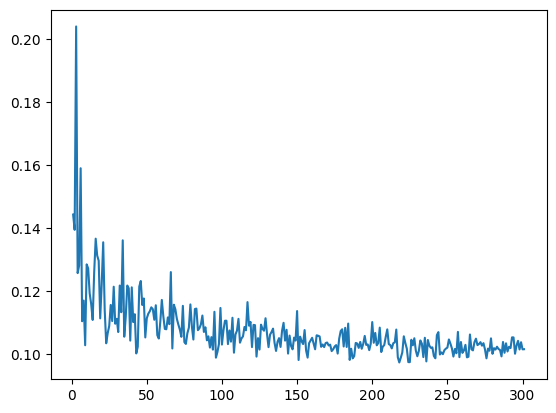

In [ ]:
plt.plot(np.arange(1,len(a)+1,1),a)


In [ ]:
np.sort(np.argsort(a)[:20]+1,np.sort(np.argsort(a)[:20]+1)

(array([218, 225, 224, 236, 151, 185, 187, 276, 242, 219,  96, 157, 263,
        217, 258, 234, 264, 123, 254, 286], dtype=int64),
 array([ 96, 123, 151, 157, 185, 187, 217, 218, 219, 224, 225, 234, 236,
        242, 254, 258, 263, 264, 276, 286], dtype=int64))